### Getting the Data

Here we will focus on the bank stocks and see they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%932008) all the way to early 2016. Here we need to start with proper imports, here we have a special import which will allow us to read data directly from the internet ie, <b>Pandas Datareader</b>.

In [1]:
from pandas_datareader import data, wb
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
sns.set_style('darkgrid')

Now we have to extract data using pandas_datareader and we will get the stock information for the following banks.
* Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

In [2]:
# df = pd.read_pickle('all_banks')
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

Now we will extract data from internet using pandas_datareader and using <b>Stooq Index Data.<b/>

In [3]:
# Bank of America
BAC = data.DataReader("BAC", 'stooq', start, end)
# CitiGroup
C = data.DataReader("C", 'stooq', start, end)
# Goldman Sachs
GS = data.DataReader("GS", 'stooq', start, end)
# JPMorgan
JPM = data.DataReader("JPM", 'stooq', start, end)
# Morgan Stanley
MS = data.DataReader("MS", 'stooq', start, end)
# Wells Fargo
WFC = data.DataReader("WFC", 'stooq', start, end)

In [4]:
BAC.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-12-31,15.199,15.251,15.036,15.036,52684386.0
2015-12-30,15.369,15.404,15.225,15.235,39201481.0
2015-12-29,15.413,15.503,15.333,15.437,51069935.0
2015-12-28,15.386,15.395,15.170,15.304,46716506.0
2015-12-24,15.474,15.529,15.386,15.430,32876023.0


In [5]:
C.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-12-31,45.121,45.397,44.843,44.843,13007619.0
2015-12-30,45.790,45.876,45.279,45.320,10111402.0
2015-12-29,45.719,46.118,45.700,45.911,11717274.0
2015-12-28,45.554,45.554,45.026,45.389,10109538.0
2015-12-24,45.478,45.902,45.452,45.674,5390620.0


In [6]:
GS.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-12-31,164.26,165.83,163.24,163.41,1955875.0
2015-12-30,166.18,166.39,164.85,165.01,1670208.0
2015-12-29,165.77,166.99,165.48,166.39,2039157.0
2015-12-28,164.80,164.93,163.08,164.67,1900707.0
2015-12-24,165.26,166.07,165.02,165.45,1221638.0


In [7]:
JPM.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-12-31,56.096,56.593,55.933,55.962,17289651.0
2015-12-30,56.816,56.823,56.314,56.434,8483821.0
2015-12-29,56.646,57.034,56.561,56.838,11588103.0
2015-12-28,56.178,56.314,55.688,56.257,7800142.0
2015-12-24,56.461,56.688,56.206,56.443,5272399.0


In [8]:
MS.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-12-31,27.539,27.878,27.419,27.456,9441652
2015-12-30,28.053,28.177,27.792,27.818,5859326
2015-12-29,27.997,28.225,27.899,28.093,7401540
2015-12-28,27.931,27.931,27.575,27.765,6280040
2015-12-24,28.111,28.233,27.997,28.034,3242007


In [9]:
WFC.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-12-31,45.500,45.865,45.254,45.374,13094138.0
2015-12-30,46.132,46.165,45.734,45.815,9604610.0
2015-12-29,45.998,46.200,45.899,46.148,9458566.0
2015-12-28,45.530,45.722,45.215,45.642,9930336.0
2015-12-24,45.882,45.982,45.665,45.756,5989620.0


Clearly we can see above that the data frames contain several columns having stock prices as opening price, highest price of the day, lowest of the day and total number of stocks exchanged on that day.

In [10]:
# Creating a list of ticker symbols
tickers = ['BAC','C','GS','JPM','MS',"WFC"]

In [11]:
# Concatenating all the data frames into one
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC], keys = tickers, axis = 1)

In [12]:
bank_stocks.head()

BAC                                           C          \
              Open    High     Low   Close      Volume    Open    High   
Date                                                                     
2006-01-03  40.601  40.823  39.934  40.739  18832700.0  421.80  425.04   
2006-01-04  40.671  40.881  40.194  40.306  20521415.0  420.61  422.66   
2006-01-05  40.306  40.524  40.083  40.359  17129894.0  416.96  419.89   
2006-01-06  40.496  40.591  40.109  40.297  14554711.0  420.77  420.91   
2006-01-09  40.428  40.645  40.116  40.324  18050003.0  418.34  419.54   

                                       ...      MS                          \
               Low   Close     Volume  ...    Open    High     Low   Close   
Date                                   ...                                   
2006-01-03  414.12  424.29  1786289.0  ...  38.813  39.706  38.516  39.582   
2006-01-04  416.17  416.44  2173546.0  ...  39.852  40.246  39.614  39.614   
2006-01-05  416.62  418.49  1318875.0  ...  39.614  39.778  39.384  39.722   
2006-01-06  414.90  418.49  1591822.0  ...  39.899  39.950  39.410  39.762   
2006-01-09  415.75  416.53  1952580.0  ...  39.800  40.253  39.793  40.178   

                          WFC                                      
               Volume    Open    High     Low   Close      Volume  
Date                                                               
2006-01-03  6575019.0  23.277  23.555  22.983  23.497  14956046.0  
2006-01-04  9755289.0  23.421  23.436  23.098  23.225  14757294.0  
2006-01-05  7065367.0  23.202  23.239  23.060  23.202  13754283.0  
2006-01-06  8424875.0  23.264  23.402  23.122  23.333  11409137.0  
2006-01-09  5067910.0  23.333  23.436  23.239  23.333   7629265.0  

[5 rows x 30 columns]

In [13]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [14]:
bank_stocks.head()

Bank Ticker     BAC                                           C          \
Stock Info     Open    High     Low   Close      Volume    Open    High   
Date                                                                      
2006-01-03   40.601  40.823  39.934  40.739  18832700.0  421.80  425.04   
2006-01-04   40.671  40.881  40.194  40.306  20521415.0  420.61  422.66   
2006-01-05   40.306  40.524  40.083  40.359  17129894.0  416.96  419.89   
2006-01-06   40.496  40.591  40.109  40.297  14554711.0  420.77  420.91   
2006-01-09   40.428  40.645  40.116  40.324  18050003.0  418.34  419.54   

Bank Ticker                             ...      MS                          \
Stock Info      Low   Close     Volume  ...    Open    High     Low   Close   
Date                                    ...                                   
2006-01-03   414.12  424.29  1786289.0  ...  38.813  39.706  38.516  39.582   
2006-01-04   416.17  416.44  2173546.0  ...  39.852  40.246  39.614  39.614   
2006-01-05   416.62  418.49  1318875.0  ...  39.614  39.778  39.384  39.722   
2006-01-06   414.90  418.49  1591822.0  ...  39.899  39.950  39.410  39.762   
2006-01-09   415.75  416.53  1952580.0  ...  39.800  40.253  39.793  40.178   

Bank Ticker                WFC                                      
Stock Info      Volume    Open    High     Low   Close      Volume  
Date                                                                
2006-01-03   6575019.0  23.277  23.555  22.983  23.497  14956046.0  
2006-01-04   9755289.0  23.421  23.436  23.098  23.225  14757294.0  
2006-01-05   7065367.0  23.202  23.239  23.060  23.202  13754283.0  
2006-01-06   8424875.0  23.264  23.402  23.122  23.333  11409137.0  
2006-01-09   5067910.0  23.333  23.436  23.239  23.333   7629265.0  

[5 rows x 30 columns]

### Exploratory Data Analysis

In [15]:
# max Close price for each bank's stock throughout the time period
for tick in tickers:
    print(tick, bank_stocks[tick]['Close'].max())

BAC 47.505
C 485.57
GS 210.17
JPM 58.967
MS 60.624
WFC 48.198


In [16]:
# Alternate method
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     47.505
C      485.570
GS     210.170
JPM     58.967
MS      60.624
WFC     48.198
dtype: float64

In [17]:
# Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock
returns = pd.DataFrame()

In [18]:
for tick in tickers:
    returns[tick+" Return"] = bank_stocks[tick]['Close'].pct_change()

In [19]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010629,-0.018501,-0.013638,-0.014285,0.000808,-0.011576
2006-01-05,0.001315,0.004923,-0.000371,0.003088,0.002726,-0.000990
2006-01-06,-0.001536,0.000000,0.013925,0.007071,0.001007,0.005646
2006-01-09,0.000670,-0.004684,0.011994,0.016227,0.010462,0.000000


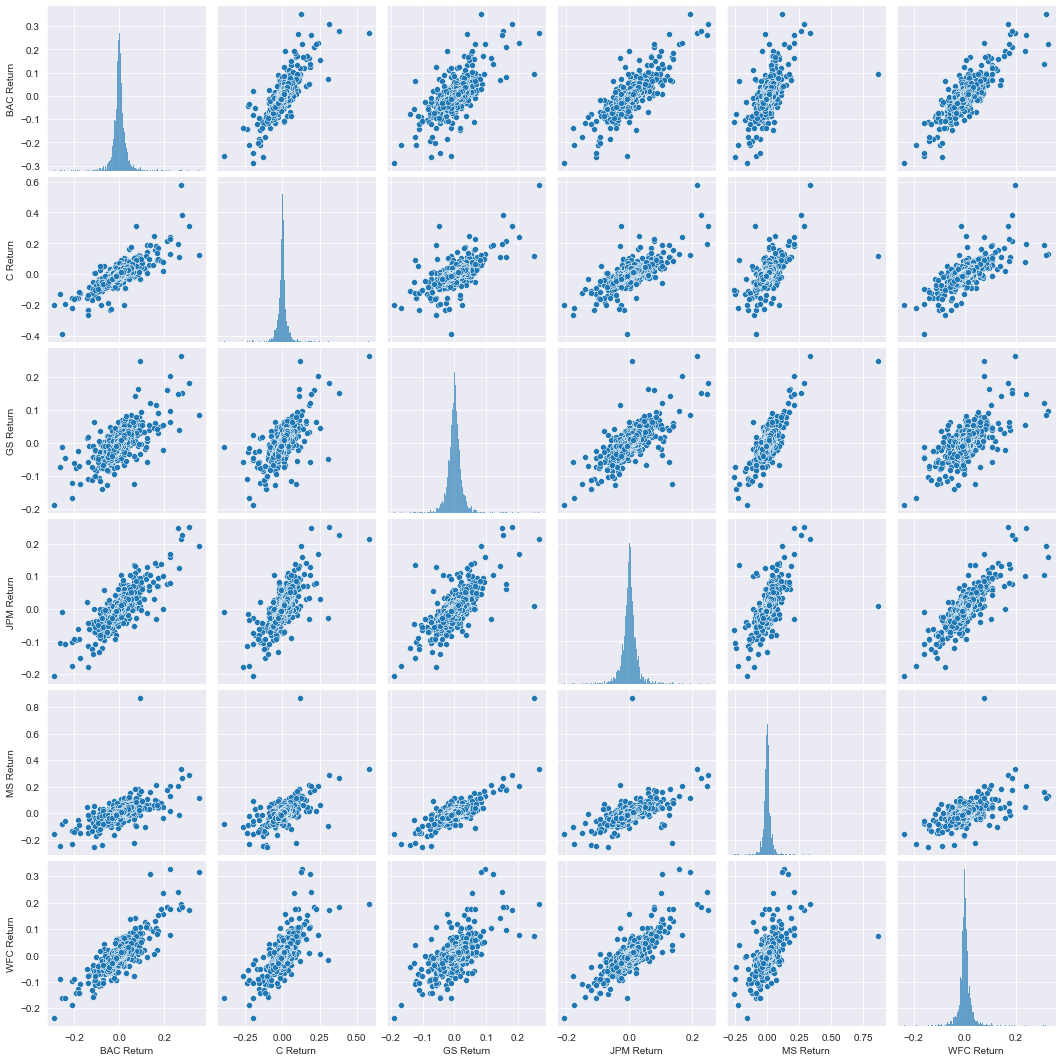

In [20]:
# Create a pairplot using seaborn of the returns dataframe
sns.pairplot(returns[1:])

In [21]:
#  figure out on what dates each bank stock had the best and worst single day returns
# Values
returns.min()

BAC Return   -0.289678
C Return     -0.390235
GS Return    -0.189581
JPM Return   -0.207435
MS Return    -0.258752
WFC Return   -0.238372
dtype: float64

In [22]:
# Dates
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [23]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [24]:
# Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?
returns.std()

BAC Return    0.036605
C Return      0.038616
GS Return     0.025369
JPM Return    0.027669
MS Return     0.037706
WFC Return    0.030220
dtype: float64

More the value of standard deviation the riskiest is the stock, less the value of the standard deviation more steady is the stock. SO clearly we can see GS return is the safest and C return is the riskiest.

In [25]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016149
C Return      0.015280
GS Return     0.014027
JPM Return    0.013965
MS Return     0.016007
WFC Return    0.012546
dtype: float64

C:\Users\Talha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MS Return', ylabel='Density'>

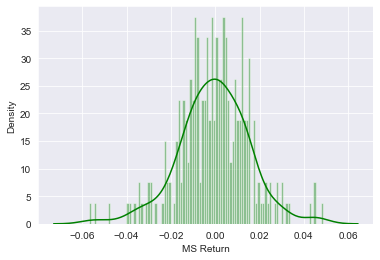

In [26]:
# distplot using seaborn of the 2015 returns for Morgan Stanley
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'], color = 'green', bins = 100)

C:\Users\Talha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='C Return', ylabel='Density'>

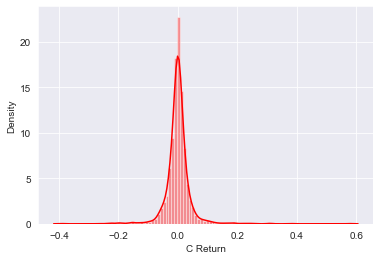

In [27]:
# distplot using seaborn of the 2008 returns for CitiGroup
sns.distplot(returns.loc['2008-01-01':'2088-12-31']['C Return'], color='red', bins = 100)

### Some more visualization using another libraries

In [28]:
import plotly
import cufflinks as cf
cf.go_offline()
sns.set_style('whitegrid')

In [29]:
bank_stocks.head()

Bank Ticker     BAC                                           C          \
Stock Info     Open    High     Low   Close      Volume    Open    High   
Date                                                                      
2006-01-03   40.601  40.823  39.934  40.739  18832700.0  421.80  425.04   
2006-01-04   40.671  40.881  40.194  40.306  20521415.0  420.61  422.66   
2006-01-05   40.306  40.524  40.083  40.359  17129894.0  416.96  419.89   
2006-01-06   40.496  40.591  40.109  40.297  14554711.0  420.77  420.91   
2006-01-09   40.428  40.645  40.116  40.324  18050003.0  418.34  419.54   

Bank Ticker                             ...      MS                          \
Stock Info      Low   Close     Volume  ...    Open    High     Low   Close   
Date                                    ...                                   
2006-01-03   414.12  424.29  1786289.0  ...  38.813  39.706  38.516  39.582   
2006-01-04   416.17  416.44  2173546.0  ...  39.852  40.246  39.614  39.614   
2006-01-05   416.62  418.49  1318875.0  ...  39.614  39.778  39.384  39.722   
2006-01-06   414.90  418.49  1591822.0  ...  39.899  39.950  39.410  39.762   
2006-01-09   415.75  416.53  1952580.0  ...  39.800  40.253  39.793  40.178   

Bank Ticker                WFC                                      
Stock Info      Volume    Open    High     Low   Close      Volume  
Date                                                                
2006-01-03   6575019.0  23.277  23.555  22.983  23.497  14956046.0  
2006-01-04   9755289.0  23.421  23.436  23.098  23.225  14757294.0  
2006-01-05   7065367.0  23.202  23.239  23.060  23.202  13754283.0  
2006-01-06   8424875.0  23.264  23.402  23.122  23.333  11409137.0  
2006-01-09   5067910.0  23.333  23.436  23.239  23.333   7629265.0  

[5 rows x 30 columns]

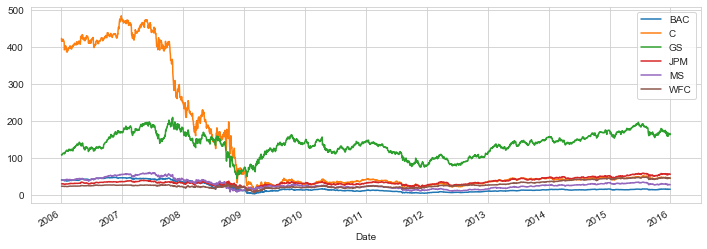

In [30]:
# line plot showing Close price for each bank for the entire index of time
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

<AxesSubplot:xlabel='Date'>

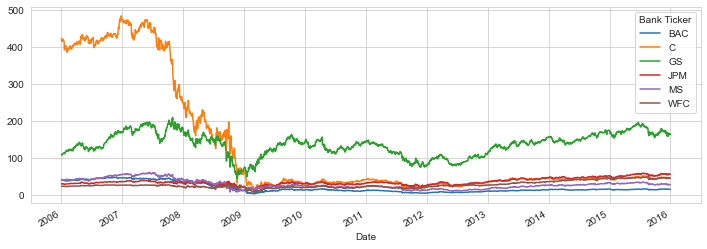

In [31]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').plot(figsize = (12,4))

In [32]:
# Using plotly
bank_stocks.xs(key='Close', axis=1, level='Stock Info').iplot()

C:\Users\Talha\AppData\Local\Temp/ipykernel_15940/2296902522.py:3: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.

C:\Users\Talha\AppData\Local\Temp/ipykernel_15940/2296902522.py:4: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



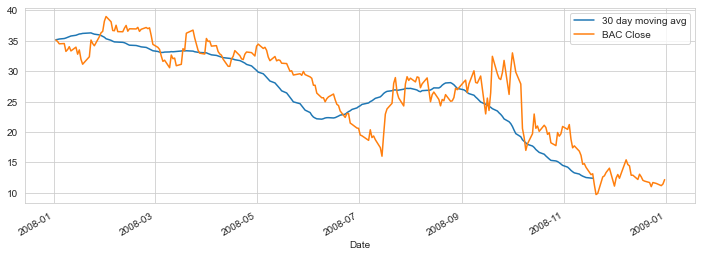

In [33]:
#  rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008
plt.figure(figsize=(12,4))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label = '30 day moving avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label = 'BAC Close')
plt.legend()

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

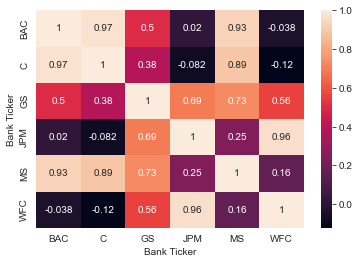

In [34]:
# Create a heatmap of the correlation between the stocks Close Price
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

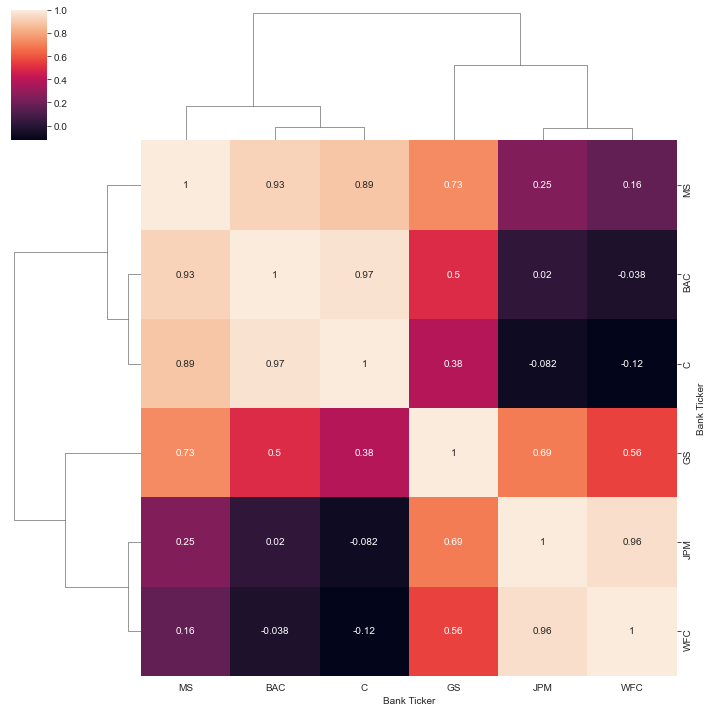

In [35]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [36]:
# Heatmap using iplot (plotly and cufflinks)
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind = 'heatmap',colorscale = 'rdylbu')

In [37]:
bac15 = BAC[['Open','High','Low','Close']].loc['2015-01-01':'2016-01-01']
bac15.iplot(kind='candle')

C:\Users\Talha\AppData\Local\Temp/ipykernel_15940/4115724683.py:1: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



In [38]:
# Simple Moving Averages plot of Morgan Stanley for the year 2015
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma', periods=[365,30,10],title='Simple Moving Averages')

C:\Users\Talha\AppData\Local\Temp/ipykernel_15940/912874944.py:2: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



In [39]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')

C:\Users\Talha\AppData\Local\Temp/ipykernel_15940/3850420300.py:1: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.

